[View in Colaboratory](https://colab.research.google.com/github/ahmed-nady/LeNet_5_Tensorflow/blob/master/LeNet_5_mnist.ipynb)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

Image Shape: (28, 28, 1)

Training Set

In [9]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])

a_padded = np.pad(a,1,"constant")
print("Padded a is: {}".format(a_padded))

Padded a is: [[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 0 0 0 0]]


In [3]:
import numpy as np
# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


# **Visualize Data**

2


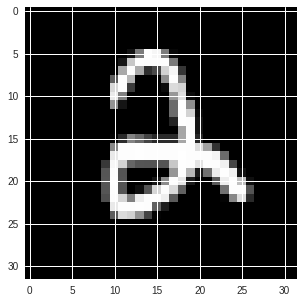

In [5]:
import matplotlib.pyplot as plt
import random

#select image to be show
index =random.randint(0,len(X_train))
image=X_train[index].squeeze()

plt.figure(figsize=(5,5))
plt.imshow(image,cmap="gray")
print(y_train[index])


# **Preprocess Data **
shuffle it

In [0]:
from sklearn.utils import shuffle
X_train,y_train =shuffle(X_train,y_train)

In [0]:
#@title Hyperparameters
EPOCHS = 8 #@param {type:"slider", min:5, max:20, step:1}
import tensorflow as tf

EPOCHS =10
BATCH_SIZE =128


# **LeNet-5 **

In [0]:
from tensorflow.contrib.layers import flatten
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='VALID')


# Create model
def LeNet(x, weights, biases):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    ##x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer 1
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)
    print("Layer 1 completed")
    # Convolution Layer 2
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)
    print("Layer 2 completed")

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = flatten(conv2)
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    print("Fully Connected Layer 1 is completed")
    fc2 = tf.add(tf.matmul(fc1,weights['wd2']),biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    print("Fully Connected Layer 2 is completed")
    # Output, class prediction
    logit = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    return logit

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 6 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 6])),
    # 5x5 conv, 6 inputs, 16 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 6, 16])),
    # fully connected, 5*5*16 inputs, 120 outputs
    'wd1': tf.Variable(tf.random_normal([5*5*16, 120])),
    'wd2': tf.Variable(tf.random_normal([120, 84])),

    # 84 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([84, 10]))
}

biases = {
    'bc1': tf.Variable(tf.zeros(6)),
    'bc2': tf.Variable(tf.zeros(16)),
    'bd1': tf.Variable(tf.zeros(120)),
    'bd2': tf.Variable(tf.zeros(84)),
    'out': tf.Variable(tf.zeros(10))
}


**Features and Labels**

In [0]:
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,10)

# **Training Pipeline**
Create a training pipeline that uses the model to classify MNIST data.

In [29]:
learning_rate = 0.001
logits = LeNet(x,weights,biases)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss)

Layer 1 completed
Layer 2 completed
Fully Connected Layer 1 is completed
Fully Connected Layer 2 is completed


**Model Evaluation**

Evaluate how well the loss and accuracy of the model for a given dataset.

In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

**Train the Model**

In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'models/lenet.ckpt')
  

EPOCH 7 ...
Validation Accuracy = 0.933

EPOCH 8 ...
Validation Accuracy = 0.934

EPOCH 9 ...
Validation Accuracy = 0.938

EPOCH 10 ...
Validation Accuracy = 0.943



# **Test The model**

In [39]:
print("Testing......")
with tf.Session() as sess:
  saver = saver.restore(sess, 'models/lenet.ckpt')
  test_accuracy = evaluate(X_test, y_test)
  print("Testing Accuracy: ={:.3f}".format(test_accuracy))

Testing......
INFO:tensorflow:Restoring parameters from models/lenet.ckpt
Testing Accuracy: =0.941


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm pti fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
step

In [0]:
!ls?